In [1]:
import os
import pickle
import numpy as np
import PIL.Image
from PIL import Image

import dnnlib
import dnnlib.tflib as tflib
import config
from training import misc

import matplotlib.pyplot as plt

C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\

In [2]:

fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
rnd = np.random.RandomState(5)
num_classes = 10


In [3]:
    # Initialize TensorFlow
    tflib.init_tf()

    # Load pre-trained network
    dir = 'results/vm/'
    fn = 'network-snapshot-cifar2.pkl'
    _G, _D, Gs = pickle.load(open(os.path.join(dir,fn), 'rb'))

    # Print network details
    Gs.print_layers()

    # Initialize conditioning
    conditioning = np.eye(num_classes)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Gs                          Params    OutputShape       WeightShape     
---                         ---       ---               ---             
latents_in                  -         (?, 512)          -               
labels_in                   -         (?, 10)           -               
lod                         -         ()                -               
dlatent_avg                 -         (512,)            -               
G_mapping/latents_in        -         (?, 512)          -               
G_mapping/labels_in         -         (?, 10)           -               
G_mapping/LabelConcat       5120      (?, 1024)         (10, 512)       
G_mapping/PixelNorm         -         (?, 1024)         -               
G_mapping/Dense0            524800    (?, 512)          (1024, 512)     
G_mapping/Dense1            262656    (?, 512)          (512, 512)      
G_mapping/Dense2           

In [4]:
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship','truck']

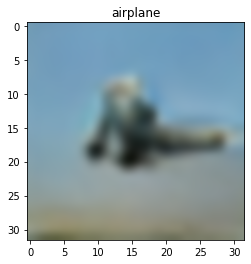

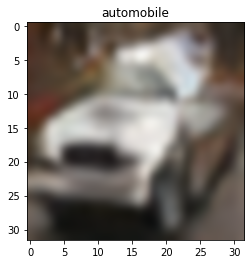

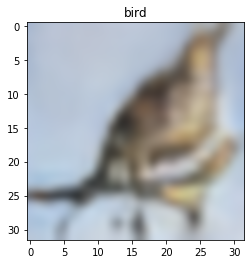

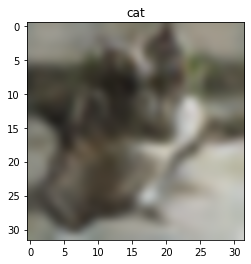

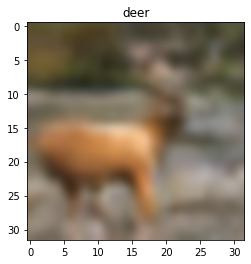

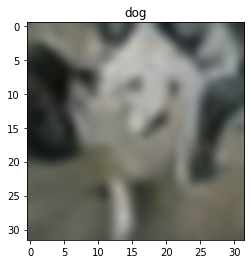

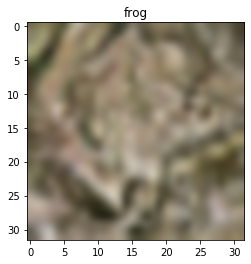

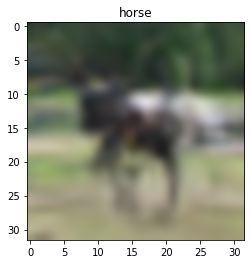

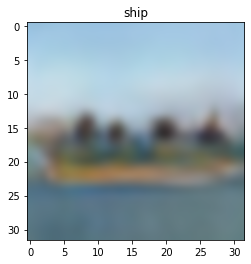

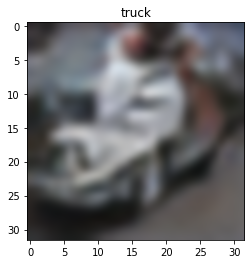

In [5]:
for i, rnd in enumerate([np.random.RandomState(i) for i in np.arange(1)]):

        # Pick latent vector.
        latents = rnd.randn(num_classes, Gs.input_shape[1])

        # Generate image.
        images = Gs.run(latents, conditioning, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
        #images = images.reshape(32*10, 32, 3)

        # Save image.
        #png_filename = os.path.join(dir, 'example_{}.png'.format(i))
        #PIL.Image.fromarray(images, 'RGB').save(png_filename)
        
        for im, t  in zip(images, names):
            im = PIL.Image.fromarray(im, 'RGB')
            plt.title(t)
            plt.imshow(im,interpolation='bicubic')
            plt.show()